# <center> Project 1 - Unsupervised Learning Classification</center>
## <center> Due: Oct 15$^{th}$ 11:59 PM</center>

In this project, we are going to implement models. Unfortunately, the data set, `CS559_Fall21_Project1_02.csv`, is not labeled except the target, `Class`, and therefore, we can not straightly use supervised leanring algorithms until we learn about data - using unsupervised learning techniques in preprocessing is essential. To build models, we are allowed to use any of provided modules and libraries. **The exploratory and feature engineerings are required but not limited - all your work and process must be justified and explained in notebook.**

### Models:
- You are going to build three different classifiers using KMeans, K Nearest Neighbor (KNN), and Logistic Regression. 
    - KMeans: KMeans arbitrary use ID indices. Cluster ID indicates the subgroup number each observation belongs to and **it does not neccessary need to have the same ID as the target ID**. The task is to check whether the model clusters and subgroups each observation to the same classes. Then perform data preprocessing in order to subgroup observations correctly as much as possible. In order to check the accuracy of clustering, the cluster IDs  may need to be **relabeled** to match with their subgroup `Class` IDs. 
    - KNN: The accuracy of KNN will likely to decrease as k value increases. The task is to determine the threshold of k value reaches to **95%**. 
    - Logistic Regression: There are several assumptions/conditions needed in order for Logistic Regression to perform well. The task is to EDA to verify if the data is suitable for Logistic Regression and perform data preprocessing to raise the accuracy of model as high as possible. When the model was applied to the raw data, the accuracy was around 35%. 
- In this project, we are not interested in optimizing the models by tunning hyperparameters. Therefore, validation and testing are not necessary. Use the entire dataset as a train data set.     
- Accuracy Report: The accuracy is the accuracy of trained model (remember that we do not split the data set). The accuracy must be reported in Data Frame format as an example shown below. When you report the accuracy of models, please provide the name of algorithms, number of features used, and the accuracy in percentile. 
|Model Number | Algorithm (s)| Number of features | Accuracy (%)|
|---|---|---|---|
| 0 | Logistic Regression | 3 | 35%|
| 1 | KMeans | -- | -- |
| 2 | KNN | -- | -- |
| 3 | Logistic Regression | -- | -- |

### Grade Scheme: 

| Components | Maximum Points |
| --- | --- |
| Effort (cleanness, completeness, etc)| 20 |
| EDA and Feature Engineering (w/ visualizations) | 20 |
| Modeling | 20 |
| Explanation (w/ visualizations) | 20 |
| Result | 20 |


### Submission:
- No formal report. However, all work (EDA, Preprocessing, Modeling) must be **explained and summarized** at the end of each model, not in the middle of implementations. 
- Submit the notebook and its exported HTML files. 
- Considering the working period of the project, **NO LATE SUBMISSIONS ARE ACCEPTED**. 
- No resubmissions due to incorrect files, corrections, etc. 

#### Below, the libraries needed for this project are provided and plotting in 2-D and 3-D are also provided. 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
def plot_2D(df,comp1,comp2,target):
    sns.scatterplot(x=comp1,y=comp2,data=df,hue=target)

def plot_3D(df, comp1,comp2,comp3,target):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[comp1],df[comp2],df[comp3],c=df[target])
    ax.set_xlabel(comp1)
    ax.set_ylabel(comp2)
    ax.set_zlabel(comp3)
    plt.show()

In [4]:
original_df = pd.read_csv('./CS559_Fall21_Project1_02.csv')

In [5]:
original_df.head(5)

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,Class
0,0,9.4202,-4.3507,10.3764,0.66768,0.33387,0.33355,0.33399,0.33367,0.33391,1
1,1,9.7044,-4.4601,10.6803,0.66749,0.33360,0.33352,0.33345,0.33363,0.33395,1
2,2,9.8075,-4.0894,10.6259,0.66742,0.33347,0.33315,0.33301,0.33364,0.33364,1
3,3,9.2771,-4.0349,10.1166,0.66782,0.33322,0.33394,0.33379,0.33380,0.33391,1
4,4,9.6447,-3.5968,10.2936,0.66768,0.33391,0.33301,0.33306,0.33326,0.33329,1


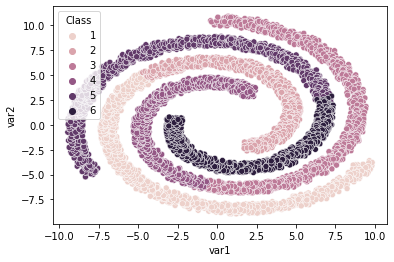

In [6]:
plot_2D(original_df,'var1', 'var2','Class')

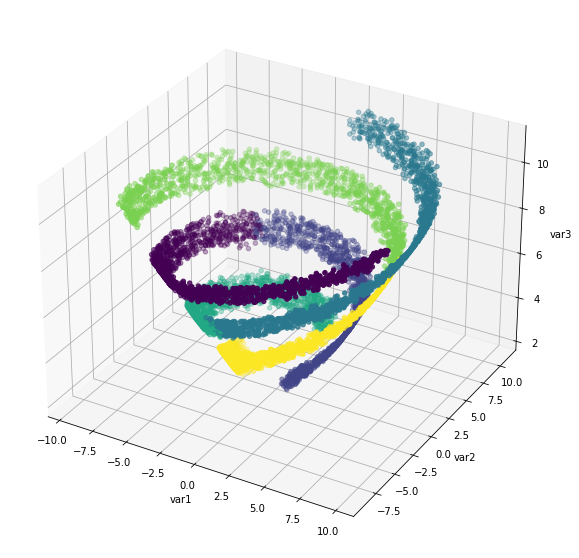

In [7]:
plot_3D(original_df,'var1','var2','var3','Class')

In [8]:
# assert False

### Project 1 Starts from here

#### Model 1: KMeans

In [9]:
def elbow_method(features, k):
    inertia_values = []
    k_list = list(range(1, k+1))
    for i in k_list:
        k_mean = KMeans(n_clusters = i)
        k_mean.fit(features)
        inertia = k_mean.inertia_
        inertia_values.append(inertia)
        print(f'Fitting KMeans with k = {i} | Intertia = {inertia}')
        
    plt.plot(k_list, inertia_values, marker = 'o')
    plt.title('Elbow Method for different n_clusters')
    plt.xlabel(f'n_cluster')
    plt.ylabel(f'Inertia')
    plt.show()

def get_metrics(y_predict, y_true): 
    print(classification_report(y_true, y_predict))
    accuracy = accuracy_score(y, y_predict)
    precision, recall, f1score, support = precision_recall_fscore_support(y_true, y_predict, average='macro')
    cm = confusion_matrix(y_true, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot = True, fmt = '.1f', ax = ax)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    plt.show()
    return accuracy, precision, recall, f1score, support

def get_pca_components(X):
    y = []
    n_components = X.shape[-1]
    
    pca = PCA(n_components = n_components)
    pca.fit(X)
    y = np.cumsum(pca.explained_variance_ratio_)
    list_components = list(range(1, n_components + 1))
    plt.plot(list_components, y, marker = 'o')
    plt.axhline(y = .95, color = 'r', linestyle = '-')
    plt.title('PCA Variance vs. n_components')
    plt.xlabel('n_components')
    plt.ylabel('Cumulative Variance')
    plt.show()
    
def map_kmeans_predict(modeling_df):
    unique_clusters = modeling_df.k_means_predict.unique()
    cluster_map_dict = {}
    for cluster in unique_clusters:
        subset_df = modeling_df[modeling_df.k_means_predict == cluster]
        target = subset_df.Class.value_counts().sort_values(ascending = False).index[0]
        cluster_map_dict[cluster] = target
    mapped_predictions = modeling_df.k_means_predict.map(lambda x: cluster_map_dict[x]) #now k_cluster_mapped will correspond the target variable
    return mapped_predictions.values

def get_vif_df(df): 
    return pd.DataFrame(np.linalg.inv(df.corr().values), index = df.corr().index, columns = df.columns)

##### EDA / Preprocessing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    7500 non-null   int64  
 1   var1    7500 non-null   float64
 2   var2    7500 non-null   float64
 3   var3    7500 non-null   float64
 4   var4    7500 non-null   float64
 5   var5    7500 non-null   float64
 6   var6    7500 non-null   float64
 7   var7    7500 non-null   float64
 8   var8    7500 non-null   float64
 9   var9    7500 non-null   float64
 10  Class   7500 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 644.7 KB
None


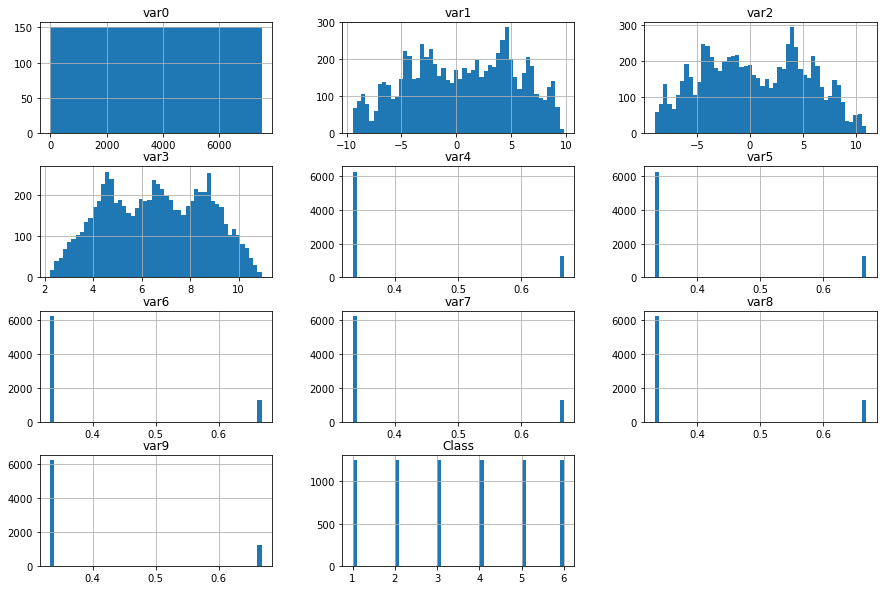

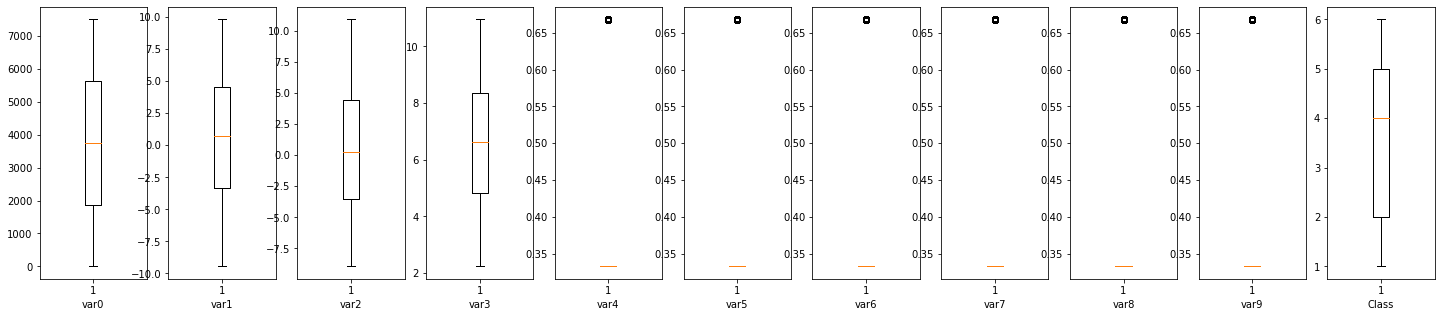

6    1251
2    1251
4    1251
3    1249
5    1249
1    1249
Name: Class, dtype: int64


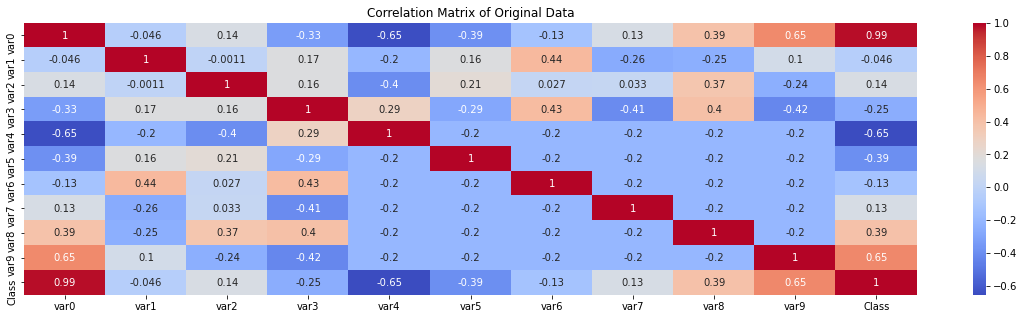

In [10]:
##### EDA / Preprocessing starts here
k_means_df = original_df.copy()
print(k_means_df.info())
k_means_df.hist(bins = 50, figsize = (15, 10))
plt.show()

fig, ax = plt.subplots(1, len(k_means_df.columns), figsize = (25, 5))
for idx, c in enumerate(k_means_df.columns):
    ax[idx].boxplot(k_means_df[c])
    ax[idx].set_xlabel(c)
plt.show()

fig, ax = plt.subplots(1, figsize = (20, 5))
ax.set_title('Correlation Matrix of Original Data')
correlation_matrix = k_means_df.corr()
sns.heatmap(correlation_matrix, ax = ax, cmap = 'coolwarm', xticklabels = correlation_matrix.columns, yticklabels = correlation_matrix.columns, annot= True)

print(k_means_df.Class.value_counts())

In [47]:
vif_df = get_vif_df(k_means_df)
vif_df

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,Class
var0,408.626093,-23.891111,-19.058151,129.900468,0.993923,76.274986,-1.496559,71.667534,-13.952030,69.531878,-387.659233
var1,-23.891111,3.032484,1.221776,-8.331876,1.051889,-4.553858,-0.247609,-4.391244,0.750128,-5.372277,24.094328
var2,-19.058151,1.221776,2.476962,-6.642837,0.306274,-4.157413,0.195947,-3.406290,0.694252,-2.657089,17.339494
var3,129.900468,-8.331876,-6.642837,45.289840,-0.949516,25.259557,-1.893555,23.576487,-6.314174,22.756600,-122.591361
var4,0.993923,1.051889,0.306274,-0.949516,864.890359,604.120407,345.561105,86.268024,-171.993567,-432.125897,1186.832159
var5,76.274986,-4.553858,-4.157413,25.259557,604.120407,489.897737,343.907035,228.165679,81.766818,-32.309328,523.664225
var6,-1.496559,-0.247609,0.195947,-1.893555,345.561105,343.907035,345.040493,341.991009,342.326184,340.467461,5.243606
var7,71.667534,-4.391244,-3.406290,23.576487,86.268024,228.165679,341.991009,484.395767,595.893043,739.492849,-655.358379
var8,-13.952030,0.750128,0.694252,-6.314174,-171.993567,81.766818,342.326184,595.893043,857.589593,1110.195289,-1165.511173
var9,69.531878,-5.372277,-2.657089,22.756600,-432.125897,-32.309328,340.467461,739.492849,1110.195289,1513.444841,-1837.791223


          var1      var2      var3      var4
0     1.833995 -0.998073  1.833239  2.237479
1     1.892427 -1.020584  1.980664  2.235952
2     1.913625 -0.944306  1.954274  2.235390
3     1.804573 -0.933092  1.707208  2.238604
4     1.880153 -0.842946  1.793072  2.237479
...        ...       ...       ...       ...
7495 -0.588273 -0.049524 -2.048156 -0.444826
7496 -0.639262 -0.041746 -1.926588 -0.446433
7497 -0.660645 -0.052983 -1.879048 -0.446192
7498 -0.726500  0.060552 -1.679329 -0.445549
7499 -0.611198  0.010055 -1.971800 -0.443541

[7500 rows x 4 columns]
Fitting KMeans with k = 1 | Intertia = 29999.999999999854
Fitting KMeans with k = 2 | Intertia = 20414.845891294673
Fitting KMeans with k = 3 | Intertia = 14055.434991409973
Fitting KMeans with k = 4 | Intertia = 10982.313675924283
Fitting KMeans with k = 5 | Intertia = 9071.21186575792
Fitting KMeans with k = 6 | Intertia = 7157.889636031822
Fitting KMeans with k = 7 | Intertia = 5748.040749813768
Fitting KMeans with k = 8 | Inter

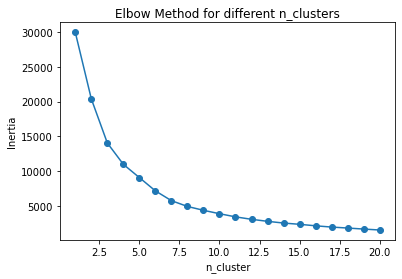

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1249
           2       1.00      0.73      0.84      1251
           3       0.98      0.95      0.96      1249
           4       0.95      1.00      0.97      1251
           5       1.00      0.99      0.99      1249
           6       0.78      0.98      0.87      1251

    accuracy                           0.94      7500
   macro avg       0.95      0.94      0.94      7500
weighted avg       0.95      0.94      0.94      7500



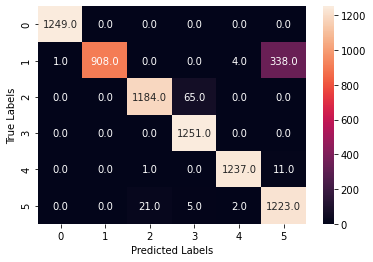

In [26]:
features = ['var1', 'var2', 'var3', 'var4']
target = ['Class']
X = k_means_df[features]
y = k_means_df[target]
X_scaled = pd.DataFrame()
for i in features:
    sc = StandardScaler()
    X_scaled[i] = sc.fit_transform(X[i].values.reshape(-1, 1)).ravel()
print(X_scaled)
modeling_df = X_scaled.copy()
modeling_df['Class'] = y.values.ravel()
elbow_method(X_scaled, 20)
k_means = KMeans(n_clusters = 20, max_iter = 1000)
k_means.fit(X_scaled)
modeling_df['k_means_predict'] = k_means.predict(X_scaled)
k_means_predict = map_kmeans_predict(modeling_df)
modeling_df['k_means_predict_mapped'] = k_means_predict
accuracy, precision, recall, f1_score, support = get_metrics(k_means_predict, y)

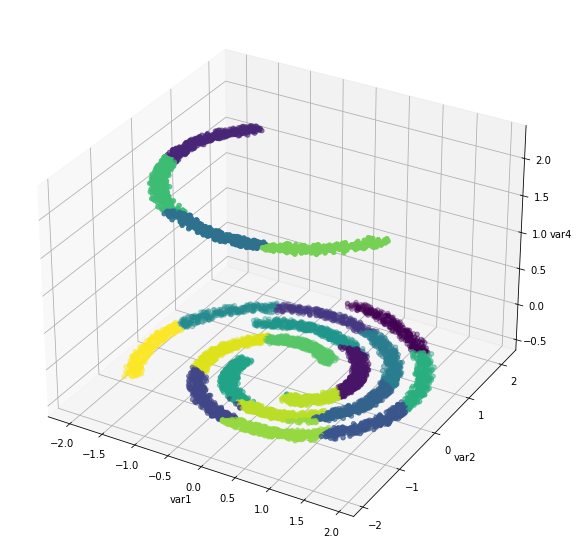

In [27]:
plot_3D(modeling_df,'var1','var2','var4','k_means_predict')

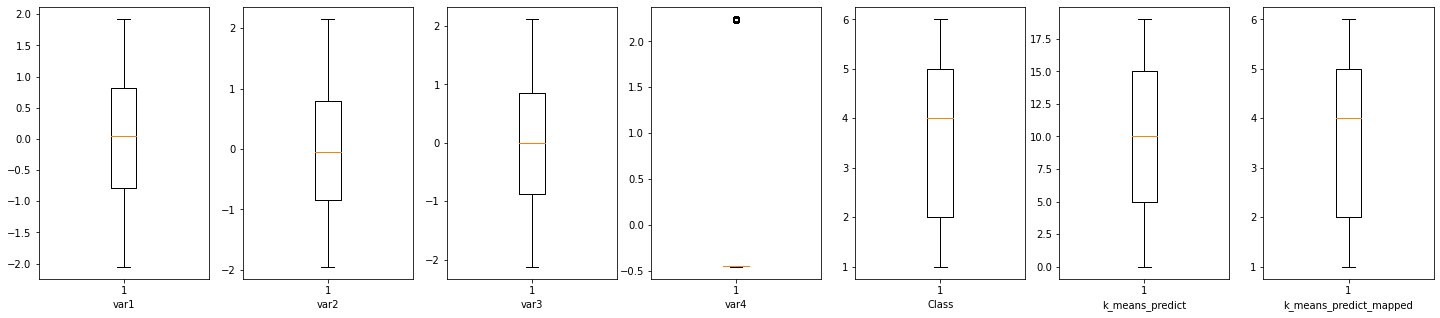

In [28]:
fig, ax = plt.subplots(1, len(modeling_df.columns), figsize = (25, 5))
for idx, c in enumerate(modeling_df.columns):
    ax[idx].boxplot(modeling_df[c])
    ax[idx].set_xlabel(c)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   var1                    7500 non-null   float64
 1   var2                    7500 non-null   float64
 2   var3                    7500 non-null   float64
 3   var4                    7500 non-null   float64
 4   Class                   7500 non-null   int64  
 5   k_means_predict         7500 non-null   int32  
 6   k_means_predict_mapped  7500 non-null   int64  
dtypes: float64(4), int32(1), int64(2)
memory usage: 381.0 KB
None


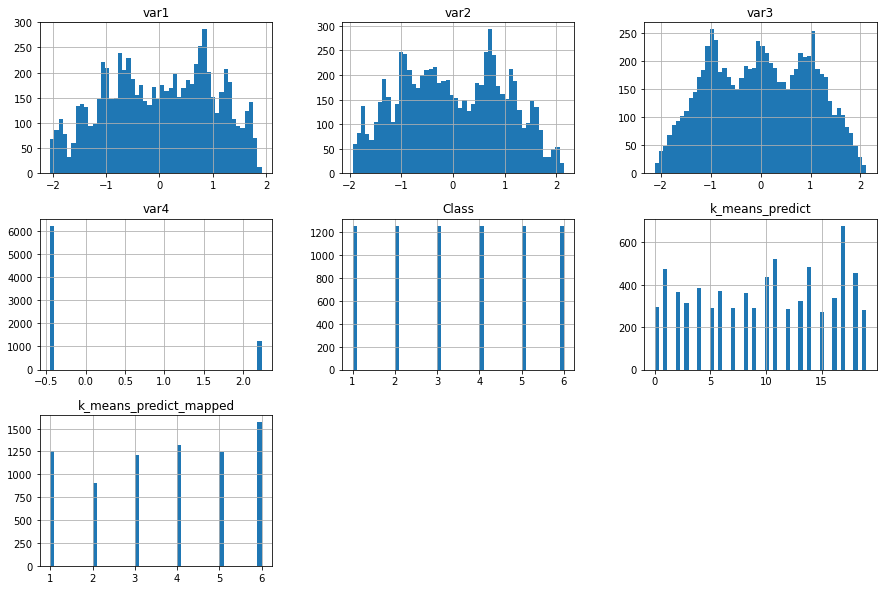

In [29]:
print(modeling_df.info())
modeling_df.hist(bins = 50, figsize = (15, 10))
plt.show()

In [ ]:
assert False

In [10]:
k_means_df.describe()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,Class
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,3749.500000,0.500111,0.499832,6.597365,0.389170,0.389211,0.389170,0.389210,0.389167,0.389208,3.500400
std,2165.207842,4.864072,4.860222,2.061535,0.124483,0.124526,0.124480,0.124528,0.124479,0.124528,1.707939
min,0.000000,-9.455200,-8.952900,2.231800,0.333000,0.333000,0.333000,0.333000,0.333000,0.333000,1.000000
25%,1874.750000,-3.352225,-3.565250,4.809175,0.333307,0.333300,0.333300,0.333290,0.333300,0.333290,2.000000
50%,3749.500000,0.696940,0.254730,6.609200,0.333600,0.333590,0.333615,0.333600,0.333610,0.333590,4.000000
75%,5624.250000,4.512175,4.404975,8.355375,0.333900,0.333900,0.333900,0.333900,0.333900,0.333900,5.000000
max,7499.000000,9.823100,10.930000,10.952700,0.668000,0.668000,0.668000,0.668000,0.668000,0.668000,6.000000


Features ['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9']
Fitting KMeans with k = 1 | Intertia = 67499.99999999977
Fitting KMeans with k = 2 | Intertia = 54339.12852772399
Fitting KMeans with k = 3 | Intertia = 42394.791295704235
Fitting KMeans with k = 4 | Intertia = 32671.726028613997
Fitting KMeans with k = 5 | Intertia = 23066.361946560344
Fitting KMeans with k = 6 | Intertia = 12172.904771926245
Fitting KMeans with k = 7 | Intertia = 10122.911375336818
Fitting KMeans with k = 8 | Intertia = 8211.019383289138
Fitting KMeans with k = 9 | Intertia = 6525.233584112465
Fitting KMeans with k = 10 | Intertia = 5468.144955958915


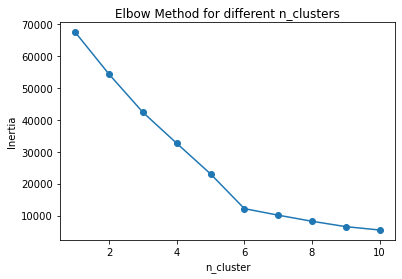

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1249
           2       1.00      1.00      1.00      1251
           3       1.00      1.00      1.00      1249
           4       1.00      1.00      1.00      1251
           5       1.00      1.00      1.00      1249
           6       1.00      1.00      1.00      1251

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



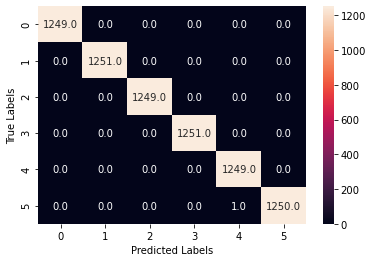

In [11]:
features = [i for i in k_means_df.columns if i not in ['Class', 'var0']]
print('Features', features)
target = ['Class']
X = k_means_df[features].values
y = k_means_df[target].values
modeling_df = k_means_df[features + target].copy()
X_scaled = StandardScaler().fit_transform(X)
elbow_method(X_scaled, 10)
k_means = KMeans(n_clusters = 6)
k_means.fit(X_scaled)
modeling_df['k_means_predict'] = k_means.predict(X_scaled)
k_means_predict = map_kmeans_predict(modeling_df)
accuracy, precision, recall, f1_score, support = get_metrics(k_means_predict, y)
del modeling_df

Features ['var4', 'var5', 'var6', 'var7', 'var8', 'var9']
Fitting KMeans with k = 1 | Intertia = 44999.99999999998
Fitting KMeans with k = 2 | Intertia = 35996.11510417519
Fitting KMeans with k = 3 | Intertia = 26998.558643334978
Fitting KMeans with k = 4 | Intertia = 18004.78006941661
Fitting KMeans with k = 5 | Intertia = 9011.827614860342
Fitting KMeans with k = 6 | Intertia = 21.79392242291413
Fitting KMeans with k = 7 | Intertia = 14.604185307421586
Fitting KMeans with k = 8 | Intertia = 7.418496232974991
Fitting KMeans with k = 9 | Intertia = 0.24159044054441733
Fitting KMeans with k = 10 | Intertia = 0.2369436276381514


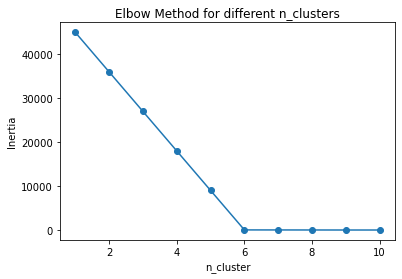

/home/samuel-linux/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1249
           2       0.50      1.00      0.67      1251
           3       0.50      1.00      0.67      1249
           4       1.00      1.00      1.00      1251
           5       0.00      0.00      0.00      1249
           6       1.00      1.00      1.00      1251

    accuracy                           0.67      7500
   macro avg       0.50      0.67      0.56      7500
weighted avg       0.50      0.67      0.56      7500



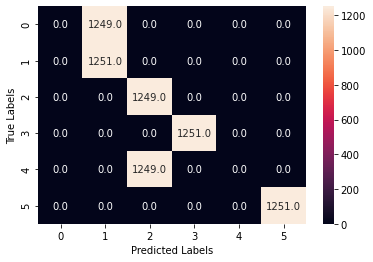

In [12]:
features = ['var4', 'var5', 'var6', 'var7', 'var8', 'var9']
print('Features', features)
target = ['Class']
X = k_means_df[features].values
y = k_means_df[target].values
modeling_df = k_means_df[features + target].copy()
X_scaled = StandardScaler().fit_transform(X)
elbow_method(X_scaled, 10)
k_means = KMeans(n_clusters = 4)
k_means.fit(X_scaled)
modeling_df['k_means_predict'] = k_means.predict(X_scaled)
k_means_predict = map_kmeans_predict(modeling_df)
accuracy, precision, recall, f1_score, support = get_metrics(k_means_predict, y)

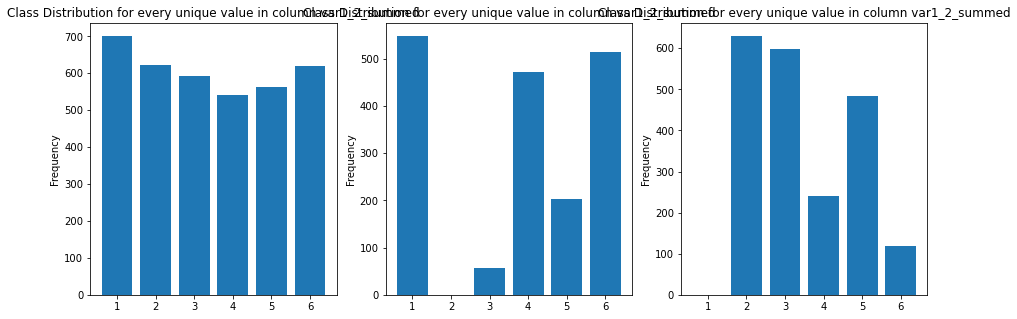

<AxesSubplot:title={'center':'Correlation Matrix of Original Data'}>

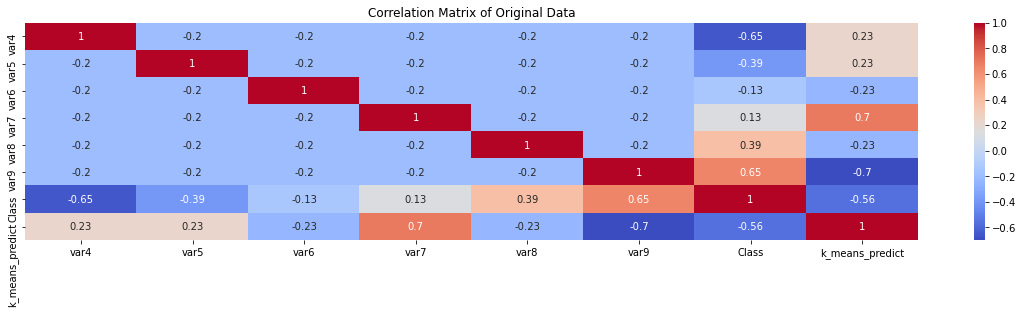

In [13]:
#investigate bimodal data
columns = [('var1', 0), ('var2', .25)]#, ('var3', 5.75, '7.75')]
for c, cutoff in columns:
    k_means_df[f'{c}_mapped'] = k_means_df[c].map(lambda x: 0 if x <= cutoff else 1)
    
k_means_df['var1_2_summed'] = k_means_df[['var1_mapped', 'var2_mapped']].sum(axis = 1)
unique_classes = k_means_df.Class.unique()
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
for idx, c in enumerate(k_means_df.var1_2_summed.unique()):
    subset_df = k_means_df[k_means_df.var1_2_summed == c]
    freq = [len(subset_df[subset_df.Class == i]) for i in unique_classes]
    ax[idx].bar(unique_classes, freq)
    ax[idx].set_ylabel('Frequency')
    ax[idx].set_title('Class Distribution for every unique value in column var1_2_summed')
plt.show()

k_means_df = k_means_df[[i for i in k_means_df.columns if i not in ['var0', 'Class']] + ['Class']]
plt.figure(figsize= (20,4))
plt.title('Correlation Matrix of Original Data')
correlation_matrix = modeling_df.corr()
sns.heatmap(correlation_matrix, cmap = 'coolwarm', xticklabels = correlation_matrix.columns, yticklabels = correlation_matrix.columns, annot= True)

Features Index(['var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var1_2_summed'], dtype='object')
Fitting KMeans with k = 1 | Intertia = 48852.62119999999
Fitting KMeans with k = 2 | Intertia = 36107.80489618335
Fitting KMeans with k = 3 | Intertia = 26585.888469024005
Fitting KMeans with k = 4 | Intertia = 17558.58562873137
Fitting KMeans with k = 5 | Intertia = 9517.964721434015
Fitting KMeans with k = 6 | Intertia = 5007.163758055718
Fitting KMeans with k = 7 | Intertia = 4184.32359062748


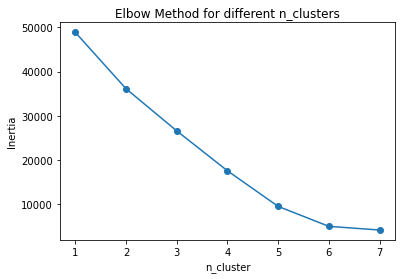

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1249
           2       1.00      1.00      1.00      1251
           3       1.00      1.00      1.00      1249
           4       1.00      1.00      1.00      1251
           5       1.00      1.00      1.00      1249
           6       1.00      1.00      1.00      1251

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



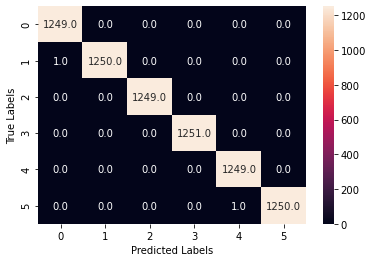

In [25]:
features = ['var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9']
target = ['Class']
X = k_means_df[features]
y = k_means_df[target].values
sc = StandardScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X), columns = X.columns)
X_scaled['var1_2_summed'] = k_means_df.var1_2_summed.values
print('Features', X_scaled.columns)
modeling_df = X_scaled.copy()
modeling_df['Class'] = y
X_scaled = X_scaled.values
elbow_method(X_scaled, 7)
k_means = KMeans(n_clusters = 6)
k_means.fit(X_scaled)
modeling_df['k_means_predict'] = k_means.predict(X_scaled)
k_means_predict = map_kmeans_predict(modeling_df)
accuracy, precision, recall, f1_score, support = get_metrics(k_means_predict, y)

In [ ]:
pca_features = ['var4', 'var5', 'var6']
target = ['Class']
X = k_means_df[pca_features].values
y = k_means_df[target].values
modeling_df = k_means_df[pca_features + target].copy()
X_scaled = StandardScaler().fit_transform(X)
get_pca_components(X_scaled)
pca = PCA(n_components = 2)
pca_features = pca.fit_transform(X_scaled)
for i in range(0, pca_features.shape[-1]):
    modeling_df[f'pca_{i}'] = pca_features[:,i]
pca_columns = [i for i in modeling_df.columns if 'pca' in i] 
print(pca_columns)
X = modeling_df[pca_columns]
elbow_method(X, 7)
k_means = KMeans(n_clusters = 5)
k_means.fit(X_scaled)
modeling_df['k_means_predict'] = k_means.predict(X_scaled)
k_means_predict = map_kmeans_predict(modeling_df)
accuracy, precision, recall, f1_score, support = get_metrics(k_means_predict, y)
del modeling_df

In [ ]:
assert False

In [ ]:
assert False

In [ ]:
#investigate bimodal data
# print(k_means_df[k_means_df.var3 < 7.9].var3.sort_values(ascending = False))
columns = [('var1', 0), ('var2', .25)]#, ('var3', 5.75, '7.75')]
for c, cutoff in columns:
    k_means_df[f'{c}_mapped'] = k_means_df[c].map(lambda x: 0 if x <= cutoff else 1)
k_means_df['var1_2_summed'] = k_means_df[['var1_mapped', 'var2_mapped']].sum(axis = 1)
unique_classes = subset_df.Class.unique()
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
for idx, c in enumerate(k_means_df.var1_2_summed.unique()):
    subset_df = k_means_df[k_means_df.var1_2_summed == c]
    y = [len(subset_df[subset_df.Class == i]) for i in unique_classes]
    ax[idx].bar(unique_classes, y)
    ax[idx].set_ylabel('Frequency')
    ax[idx].set_title('Class Distribution for every unique value in column var1_2_summed')
plt.show()

k_means_df = k_means_df[[i for i in k_means_df.columns if i not in ['var0', 'Class']] + ['Class']]
plt.figure(figsize= (20,4))
plt.title('Correlation Matrix of Original Data')
correlation_matrix = k_means_df.corr()
sns.heatmap(correlation_matrix, cmap = 'coolwarm', xticklabels = correlation_matrix.columns, yticklabels = correlation_matrix.columns, annot= True)

In [ ]:
# columns = ['var4', 'var5', 'var6', 'var7', 'var8', 'var9']
columns = ['var4', 'var9', 'var6', 'var7', 'var8', 'var5']
height = 3
width = 2
fig, ax = plt.subplots(height, width, figsize = (15,10))
row = 0
idx = 0
for c in columns:
    lower_bound = k_means_df[k_means_df[c] < .4]
    upper_bound = k_means_df[k_means_df[c] > .6]
    if idx > width-1:
        idx = 0
        row += 1
    lower_bound.Class.hist(bins = 50, ax = ax[row, idx], label = 'Lower Bound (<.4)')
    upper_bound.Class.hist(bins = 50, ax = ax[row, idx], label = 'Upper Bound (>.6)')
    ax[row, idx].set_title(f'Column {c} Class Distribution for Each Bound')
    ax[row, idx].legend(loc = 4)
    idx += 1
plt.show()

In [ ]:
k_means_df = k_means_df[[i for i in k_means_df.columns if i not in ['var0'] and 'pca' not in i]]

def get_pca_components(X):
    y = []
    n_components = X.shape[-1]
    
    pca = PCA(n_components = n_components)
    pca.fit(X)
    y = np.cumsum(pca.explained_variance_ratio_)
    list_components = list(range(1, n_components + 1))
    plt.plot(list_components, y, marker = 'o')
    plt.axhline(y = .95, color = 'r', linestyle = '-')
    plt.title('PCA Variance vs. n_components')
    plt.xlabel('n_components')
    plt.ylabel('Cumulative Variance')
    plt.show()

pca_features = k_means_df[['var5', 'var6', 'var7', 'var8']]   #[['var1', 'var2', 'var3', 'var5']]
scaled_df = pd.DataFrame()
for c in pca_features.columns:
    sc = StandardScaler()
    scaled_values = sc.fit_transform(pca_features[c].values.reshape(-1, 1))
    scaled_df[c] = scaled_values.ravel()
X_pca = pca_features.values
get_pca_components(X_pca)
pca = PCA(n_components = 4)
pca_features = pca.fit_transform(X_pca)
for i in range(0, pca_features.shape[-1]):
    k_means_df[f'pca_{i}'] = pca_features[:,i]

k_means_df = k_means_df[[i for i in k_means_df.columns if i != 'Class'] + ['Class']]
df_summed = k_means_df.corr() 
plt.figure(figsize = (20,5))
sns.heatmap(df_summed, cmap = 'coolwarm', xticklabels = k_means_df.columns, yticklabels = k_means_df.columns, annot= True)
plt.show()


k_means_df.head()

##### Model Implementation

In [ ]:
feature_column = ['pca_0', 'pca_1', 'pca_2', 'var3', 'var1_2_summed']
target_column = ['Class']
modeling_df = k_means_df[feature_column + target_column].copy()
X = k_means_df[feature_column].values
y = k_means_df[target_column].values
##### Model Implementation starts here


k_means = KMeans(n_clusters = 10) 
labels = k_means.fit_predict(X)
modeling_df['k_means_predict'] = labels

# cluster_map_dict = {}
# unique_classes = modeling_df.Class.unique()
# for cl in unique_classes:
#     subset_df = modeling_df[modeling_df.Class == cl]
#     max_cluster = subset_df.k_means_predict.sort_values(ascending = False).index[0]
#     cluster_map_dict[max_cluster] = cl
# modeling_df['k_means_predict'] = modeling_df.k_means_predict.map(lambda x: cluster_map_dict[x])
##map the clusters to target value
unique_clusters = modeling_df.k_means_predict.unique()
cluster_map_dict = {}
for cluster in unique_clusters:
    subset_df = modeling_df[modeling_df.k_means_predict == cluster]
    target = subset_df.Class.value_counts().sort_values(ascending = False).index[0]
    print(cluster, target)
    cluster_map_dict[cluster] = target
modeling_df['k_means_predict'] = modeling_df.k_means_predict.map(lambda x: cluster_map_dict[x]) #now k_cluster_mapped will correspond the target variable

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_predicted_k_means = modeling_df.k_means_predict.values
print(classification_report(y, y_predicted_k_means))
k_means_accuracy = accuracy_score(y, y_predicted_k_means)
k_means_precision, k_means_recall, k_means_f1score,support = precision_recall_fscore_support(y, y_predicted_k_means, average='macro')
k_means_cm = confusion_matrix(y, y_predicted_k_means)
print(f'KMeans Clustering Accuracy = {k_means_accuracy}')
ax = plt.subplot()
sns.heatmap(k_means_cm, annot = True, fmt = '.1f', ax = ax)
ax.set_title('KMeans Classification Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()

In [ ]:
modeling_df.describe()

In [ ]:
# %matplotlib notebook
# #fig = plt.figure(figsize = (10,15))
# #ax = fig.add_subplot(111, projection = '3d')
# for i in k_means_df.Class.unique():
# #     subset = k_means_df[k_means_df.Class == i]
#     #ax.scatter(subset.pca_0.values, subset.pca_1.values, subset.pca_2.values, label = i)


#### Model 2: KNN

##### EDA / Preprocessing

In [ ]:
##### EDA / Preprocessing starts here

##### Model Implementation

In [ ]:
##### Model Implementation starts here

#### Summary:

#### Model 3: Logistic Regression

##### EDA / Preprocessing

In [ ]:
##### EDA / Preprocessing starts here

##### Model Implementation

In [ ]:
##### Model Implementation starts here

##### Summary:

### Final Result Table:

In the result table, show only the **best result** obtained in each model. If the dataset were splitted into train and test sets, report the average of accuracy of train and test sets. 

In [ ]:
Result1 = {'Model': [0,1,2,3,4], 'Algorithm':['KMeans','KNN','Logistic Regression'],'Number of Features': [],
           'Accuracy':[]}

Result1 = pd.DataFrame(Result1, columns = ['Model Number', 'Algorithm','Number of Features','Accuracy'])

